In [53]:
import os
import cv2
import sys
import glob
import json
import time
import random
import hashlib
import imutils
import argparse
import more_itertools
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import defaultdict

from core.detector import LFFDDetector

In [54]:
input_directory = "img_data"
detector_path = "configs/anime.json"
display_height = 720
use_gpu = 0
size = None
confidence_threshold = None
nms_threshold = None
extensions = "jpg,png,jpeg"

In [55]:
# Disable MXNET CUDNN autotuning since the images come in different sizes.
os.environ["MXNET_CUDNN_AUTOTUNE_DEFAULT"] = "0"

with open(detector_path, "r") as f:
    config = json.load(f)
if use_gpu > 0:
    use_gpu = True
else:
    use_gpu = False
detector = LFFDDetector(config, use_gpu=use_gpu)
extensions = extensions.split(",")
paths = list(more_itertools.flatten([glob.glob(os.path.join(input_directory, "**", f"*.{ext}"), recursive=True) for ext in extensions]))

Mon Mar 15 02:46:07 2021: Initializing.
Mon Mar 15 02:46:07 2021: Initialized (0.1494 seconds).


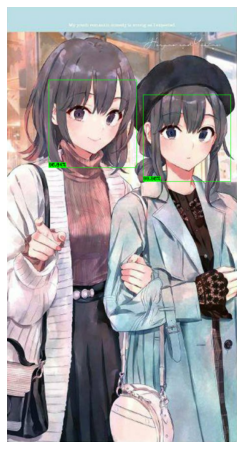

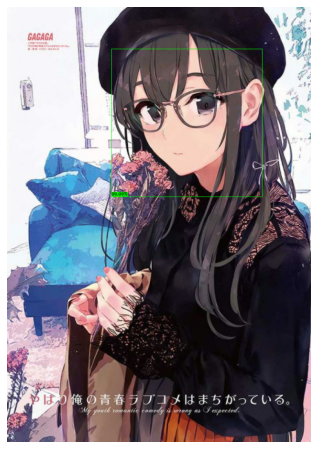

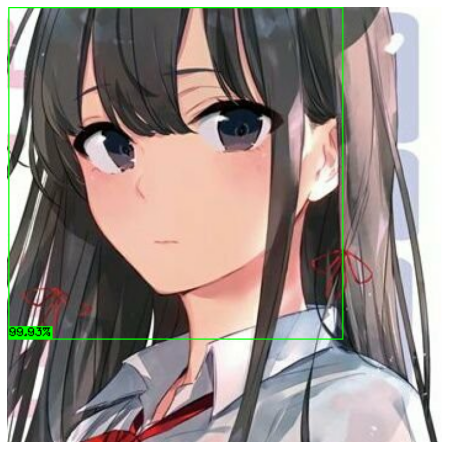

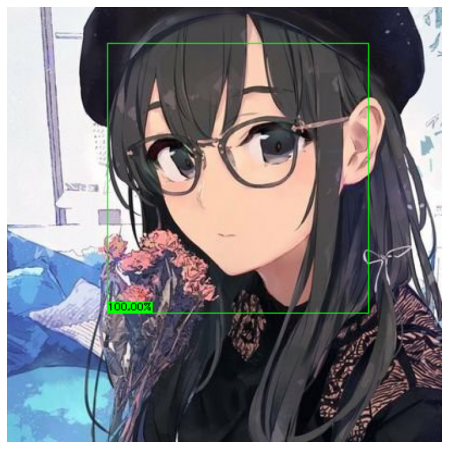

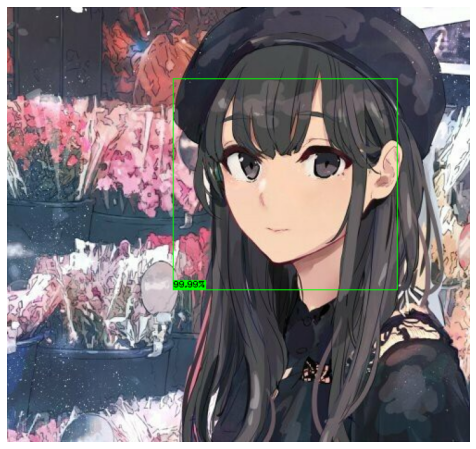

In [56]:
idx = 0
while idx < len(paths):
    path = paths[idx]
    image = cv2.imread(path)
    boxes = detector.detect(image, size=size, confidence_threshold=confidence_threshold, nms_threshold=nms_threshold)
    if boxes:
        drawn_image = detector.draw(image, boxes)
        drawn_image = imutils.resize(drawn_image, height=display_height)
        
        cv2.imwrite(f'img_result/{idx}.jpg', drawn_image)
        drawn_image = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(16, 8))
        plt.axis('off')
        plt.imshow(drawn_image)
    idx += 1